In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind #for statistical significance tests 
from scipy.stats import sem # for standard error
import seaborn as sns
import mysql.connector
%matplotlib inline

#connect to database
mydb = mysql.connector.connect(
  host="mysql", database='ALY2100', user="ALY2100", password="homework"
)

mycursor = mydb.cursor()
mycursor.execute("DROP TABLE IF EXISTS JoinUSHospitalData")
query = "DROP TABLE IF EXISTS JoinUSHospitalData "
mycursor.execute(query)

myjoin = "SELECT * FROM StateHospAM, USHospitalData WHERE StateHospAM.ein = USHospitalData.data_ein "
mycursor.execute(myjoin)
joinRes = mycursor.fetchall()
dfJoin=pd.read_sql(myjoin,mydb)
dfJoin
###  read from SQL and assign it to dfJoin variable.
## Print out the first few lines of the dfJoin data frame.

hospital_id  hospital_org_id        ein                       name  \
0                 1                1  630307951   Mizell Memorial Hospital   
1                 1                1  630307951   Mizell Memorial Hospital   
2                 1                1  630307951   Mizell Memorial Hospital   
3                 1                1  630307951   Mizell Memorial Hospital   
4                 1                1  630307951   Mizell Memorial Hospital   
...             ...              ...        ...                        ...   
113585         3386             2579  830300467  Powell Valley Health Care   
113586         3386             2579  830300467  Powell Valley Health Care   
113587         3386             2579  830300467  Powell Valley Health Care   
113588         3386             2579  830300467  Powell Valley Health Care   
113589         3386             2579  830300467  Powell Valley Health Care   

                          name_cr   street_address    city state  zip_code  \
0        Mizell Memorial Hospital  702 Main Street     Opp    AL     36462   
1        Mizell Memorial Hospital  702 Main Street     Opp    AL     36462   
2        Mizell Memorial Hospital  702 Main Street     Opp    AL     36462   
3        Mizell Memorial Hospital  702 Main Street     Opp    AL     36462   
4        Mizell Memorial Hospital  702 Main Street     Opp    AL     36462   
...                           ...              ...     ...   ...       ...   
113585  Powell Valley Health Care     777 Avenue H  Powell    WY     82435   
113586  Powell Valley Health Care     777 Avenue H  Powell    WY     82435   
113587  Powell Valley Health Care     777 Avenue H  Powell    WY     82435   
113588  Powell Valley Health Care     777 Avenue H  Powell    WY     82435   
113589  Powell Valley Health Care     777 Avenue H  Powell    WY     82435   

        fips_state_and_county_code  ...  pctttlexp_econdevlp  \
0                             1039  ...                  0.0   
1                             1039  ...                  0.0   
2                             1039  ...                  0.0   
3                             1039  ...                  0.0   
4                             1039  ...                  0.0   
...                            ...  ...                  ...   
113585                       56029  ...                  0.0   
113586                       56029  ...                  0.0   
113587                       56029  ...                  0.0   
113588                       56029  ...                  0.0   
113589                       56029  ...                  0.0   

       pctttlexp_cmntysuprt pctttlexp_envrnimprv pctttlexp_ldrdevlp  \
0                       0.0                  0.0                0.0   
1                       0.0                  0.0                0.0   
2                       0.0                  0.0                0.0   
3                       0.0                  0.0                0.0   
4                       0.0                  0.0                0.0   
...                     ...                  ...                ...   
113585                  0.0                  0.0                0.0   
113586                  0.0                  0.0                0.0   
113587                  0.0                  0.0                0.0   
113588                  0.0                  0.0                0.0   
113589                  0.0                  0.0                0.0   

       pctttlexp_cltnbldg  pctttlexp_htlhimprvadvcy pctttlexp_wrkfrcdevlp  \
0                     0.0                       0.0                0.0000   
1                     0.0                       0.0                0.0000   
2                     0.0                       0.0                0.0000   
3                     0.0                       0.0                0.0000   
4                     0.0                       0.0                0.0000   
...                   ...                       ..

In [21]:
dfJoin.info()
## dfJoin.info() prints out the variable types from dfJoin data frame. As you can see, some of the columns are integer, and some are non integer like 'name', 'city'
## This gives us a good overview of the type of variables (columns) in the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113590 entries, 0 to 113589
Columns: 162 entries, hospital_id to updated_dt
dtypes: float64(37), int64(86), object(39)
memory usage: 140.4+ MB


In [22]:
dfJoin.describe() 
# descriptive statistics only valid for truely numeric columns ($ ones); not valid for indexes or zip code or categorical like fiscal yr 
#(except for min & max)
## Yes, since descriptive statistics (correlation, std, quartiles) are computable for numeric variables.


hospital_id  hospital_org_id           ein       zip_code  \
count  113590.000000    113590.000000  1.135900e+05  113590.000000   
mean     1609.796857       868.443331  6.214670e+08   64253.284691   
std      1112.158575       816.588831  2.670265e+08   26935.353150   
min         1.000000         1.000000  1.013043e+07    1040.000000   
25%       405.000000       139.000000  3.839526e+08   44870.000000   
50%      1597.000000       540.000000  6.105946e+08   66502.000000   
75%      2634.000000      1580.000000  9.403828e+08   89113.000000   
max      3423.000000      2591.000000  9.902698e+08   99969.000000   

       fips_state_and_county_code  hospital_bed_count  \
count               113590.000000       113590.000000   
mean                 27651.461933          211.618400   
std                  17199.786075          240.412226   
min                   1003.000000            2.000000   
25%                   8014.000000           40.000000   
50%                  27155.000000          147.000000   
75%                  42083.000000          297.000000   
max                  56043.000000         2891.000000   

       medicare_provider_number     Unnamed: 0  hospital_data_id  \
count             113590.000000  113590.000000     113590.000000   
mean              255761.933410       4.308672      14043.029624   
std               172064.331077       2.803060       9868.299392   
min                10007.000000       0.000000          1.000000   
25%                60008.000000       2.000000       3301.000000   
50%               241371.000000       4.000000      13915.000000   
75%               390178.000000       7.000000      23344.000000   
max               670122.000000       9.000000      30077.000000   

           fiscal_yr  ...  pctttlexp_physimprvhse  pctttlexp_econdevlp  \
count  113590.000000  ...           113590.000000        113590.000000   
mean     2014.691364  ...                0.000045             0.000051   
std         2.848262  ...                0.002213             0.004244   
min      2010.000000  ...                0.000000             0.000000   
25%      2012.000000  ...                0.000000             0.000000   
50%      2015.000000  ...                0.000000             0.000000   
75%      2017.000000  ...                0.000000             0.000000   
max      2019.000000  ...                0.462600             1.000000   

       pctttlexp_cmntysuprt  pctttlexp_envrnimprv  pctttlexp_ldrdevlp  \
count         113590.000000         113590.000000       113590.000000   
mean               0.000113              0.000016            0.000010   
std                0.004176              0.002969            0.000164   
min                0.000000              0.000000            0.000000   
25%                0.000000              0.000000            0.000000   
50%                0.000000              0.000000            0.000000   
75%                0.000000              0.000000            0.000000   
max                0.870000              1.000000            0.030000   

       pctttlexp_cltnbldg  pctttlexp_htlhimprvadvcy  pctttlexp_wrkfrcdevlp  \
count       113590.000000             113590.000000          113590.000000   
mean             0.000043                  0.000154               0.000140   
std              0.001970                  0.009014               0.001782   
min              0.000000                  0.000000               0.000000   
25%              0.000000                  0.000000               0.000000   
50%              0.000000                  0.000000               0.000000   
75%              0.000000                  0.000000               0.000100   
max              0.635400                  1.000000               0.280000   

       pctttlexp_other  pctttlexp_total  
count    113590.000000    113590.000000  
mean          0.000023         0.000600  
std           0.001463         0.013051  
min           0.000000         0.000000  
25%          

In [23]:
# dfJoin.corr() compute all pairwise correlation between the variables (columns) in dfJoin data frame. 
# Please note that .corr() is not applicable for
# non-numeric varibles like 'name', 'country', 'city'. As you can see, the correlation of 
# each variable with itself is always 1, and that's why the diagonal 
# elements of this matrix is 1. Some variables shows strong correlation between each other like:
# tot_comm_bnfts and total_revenue (corr: 0.875), and some variables
# shows very weak or correlations between each other like fiscal_year, and hospital bed count. 
dfJoin.corr()

hospital_id  hospital_org_id       ein  zip_code  \
hospital_id                    1.000000         0.709532 -0.188862 -0.312441   
hospital_org_id                0.709532         1.000000 -0.291163 -0.465460   
ein                           -0.188862        -0.291163  1.000000  0.598664   
zip_code                      -0.312441        -0.465460  0.598664  1.000000   
fips_state_and_county_code     0.996055         0.709622 -0.213447 -0.340045   
...                                 ...              ...       ...       ...   
pctttlexp_cltnbldg             0.001706         0.003452 -0.009563 -0.008257   
pctttlexp_htlhimprvadvcy       0.000612         0.007165 -0.017614 -0.013377   
pctttlexp_wrkfrcdevlp         -0.014802         0.002288 -0.011993 -0.006136   
pctttlexp_other                0.003235         0.009404 -0.009300 -0.010045   
pctttlexp_total               -0.001021         0.011274 -0.017150 -0.017222   

                            fips_state_and_county_code  hospital_bed_count  \
hospital_id                                   0.996055           -0.111100   
hospital_org_id                               0.709622           -0.012596   
ein                                          -0.213447            0.021110   
zip_code                                     -0.340045           -0.062258   
fips_state_and_county_code                    1.000000           -0.097137   
...                                                ...                 ...   
pctttlexp_cltnbldg                            0.002540           -0.003147   
pctttlexp_htlhimprvadvcy                      0.001561            0.004679   
pctttlexp_wrkfrcdevlp                        -0.013312           -0.009648   
pctttlexp_other                               0.003697           -0.000722   
pctttlexp_total                               0.000315           -0.000003   

                            medicare_provider_number  Unnamed: 0  \
hospital_id                                 0.992449   -0.008138   
hospital_org_id                             0.717233   -0.041313   
ein                                        -0.185821   -0.022667   
zip_code                                   -0.304071   -0.021671   
fips_state_and_county_code                  0.985594   -0.006129   
...                                              ...         ...   
pctttlexp_cltnbldg                          0.001919   -0.005602   
pctttlexp_htlhimprvadvcy                    0.001402   -0.007413   
pctttlexp_wrkfrcdevlp                      -0.012939   -0.014641   
pctttlexp_other                             0.003457   -0.006975   
pctttlexp_total                            -0.000242   -0.014156   

                            hospital_data_id  fiscal_yr  ...  \
hospital_id                         0.797658   0.011045  ...   
hospital_org_id                     0.711995  -0.013117  ...   
ein                                -0.205550  -0.023872  ...   
zip_code                           -0.318156  -0.019161  ...   
fips_state_and_county_code          0.793476   0.010672  ...   
...                                      ...        ...  ...   
pctttlexp_cltnbldg                  0.001903  -0.006795  ...   
pctttlexp_htlhimprvadvcy            0.000735  -0.008566  ...   
pctttlexp_wrkfrcdevlp              -0.013519  -0.020211  ...   
pctttlexp_other                     0.003456  -0.008272  ...   
pctttlexp_total                    -0.000694  -0.016974  ...   

                            pctttlexp_physimprvhse  pctttlexp_econdevlp  \
hospital_id                              -0.004698             0.000663   
hospital_org_id                           0.002000             0.003195   
ein                                       0.007087            -0.000104   
zip_code                                  0.003079            -0.003104   
fips_state_and_county_code               -0.004872             0.000894   
...                                            ...                  ...   
pctttlexp_cltnbldg 

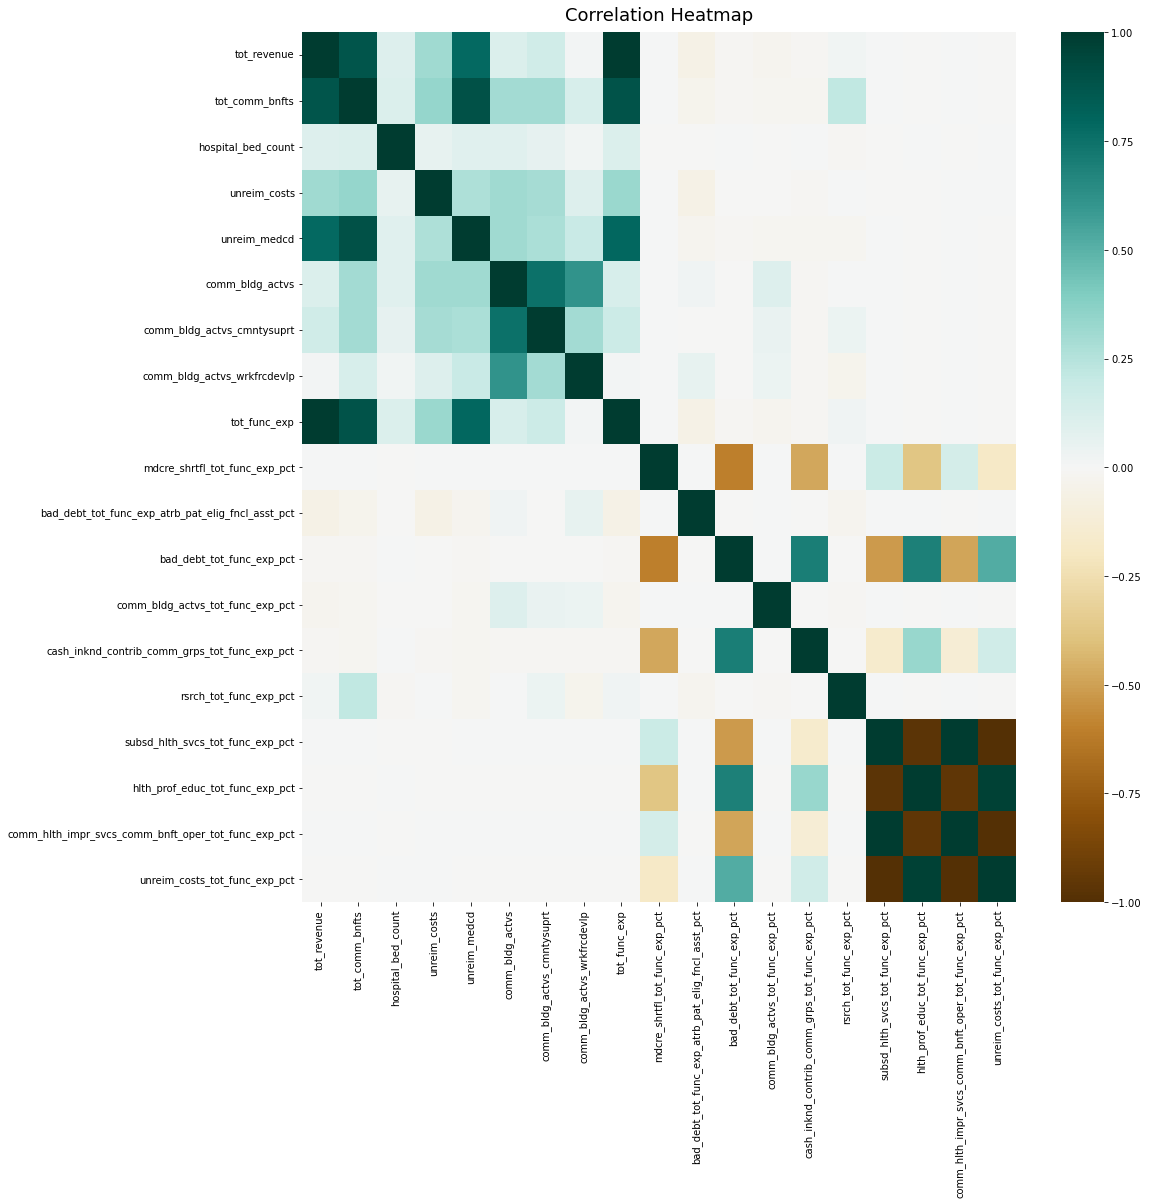

In [24]:

Sun_Features = ['tot_revenue','tot_comm_bnfts','hospital_bed_count','unreim_costs','unreim_medcd','comm_bldg_actvs','comm_bldg_actvs_cmntysuprt','comm_bldg_actvs_wrkfrcdevlp','tot_func_exp',
              'mdcre_shrtfl_tot_func_exp_pct', 'bad_debt_tot_func_exp_atrb_pat_elig_fncl_asst_pct', 'bad_debt_tot_func_exp_pct' ,'comm_bldg_actvs_tot_func_exp_pct','cash_inknd_contrib_comm_grps_tot_func_exp_pct','rsrch_tot_func_exp_pct','subsd_hlth_svcs_tot_func_exp_pct',
               'hlth_prof_educ_tot_func_exp_pct','comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct','unreim_costs_tot_func_exp_pct']

## Check the correlation of selected features

dfJoin_sub = dfJoin[Sun_Features]
MyCorr=dfJoin_sub.corr()

plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(MyCorr, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);



In [26]:
#Feature selection
#split dataset in features and target variable
#feature_cols =  ['hospital_bed_count', 'tot_revenue','unreim_costs','tot_comm_bnfts','comm_bldg_actvs','comm_bldg_actvs_htlhimprvadvcy']



#split dataset in features and target variable
Sun_Features = ['tot_revenue','tot_comm_bnfts','hospital_bed_count','unreim_costs','unreim_medcd','comm_bldg_actvs','comm_bldg_actvs_cmntysuprt','comm_bldg_actvs_wrkfrcdevlp','tot_func_exp',
              'mdcre_shrtfl_tot_func_exp_pct', 'bad_debt_tot_func_exp_atrb_pat_elig_fncl_asst_pct', 'bad_debt_tot_func_exp_pct' ,'comm_bldg_actvs_tot_func_exp_pct','cash_inknd_contrib_comm_grps_tot_func_exp_pct','rsrch_tot_func_exp_pct','subsd_hlth_svcs_tot_func_exp_pct',
               'hlth_prof_educ_tot_func_exp_pct','comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct','unreim_costs_tot_func_exp_pct']

Sun_All=['tot_revenue','tot_comm_bnfts','hospital_bed_count','unreim_costs','unreim_medcd','comm_bldg_actvs','comm_bldg_actvs_cmntysuprt','comm_bldg_actvs_wrkfrcdevlp','tot_func_exp',
              'mdcre_shrtfl_tot_func_exp_pct', 'bad_debt_tot_func_exp_atrb_pat_elig_fncl_asst_pct', 'bad_debt_tot_func_exp_pct' ,'comm_bldg_actvs_tot_func_exp_pct','cash_inknd_contrib_comm_grps_tot_func_exp_pct','rsrch_tot_func_exp_pct','subsd_hlth_svcs_tot_func_exp_pct',
               'hlth_prof_educ_tot_func_exp_pct','comm_hlth_impr_svcs_comm_bnft_oper_tot_func_exp_pct','unreim_costs_tot_func_exp_pct','urban_location_f']

dfJoin_Sub = dfJoin[Sun_All]



# Remove NAs
dfJoin_Final=dfJoin_Sub.dropna(axis=0)

X = dfJoin_Final[Sun_Features] # Features
#dfJoin = dfJoin.reset_index()


#X = dfJoin[feature_cols] # Features
y = dfJoin_Final.urban_location_f # Target variable
# Here we print our input feature matrix (x), and our output variable y
print(X)
print(y)

### We scale the features between 0-1
X_scaled = (X - X.min())/(X.max()- X.min())

#X_scaled

#len(Sun_Features)


        tot_revenue  tot_comm_bnfts  hospital_bed_count  unreim_costs  \
0          47350512         -447905                  99             0   
1          45412130          638911                  99             0   
2          43325705          547849                  99             0   
3          49264840          326471                  99             0   
4          52602437          557171                  99             0   
...             ...             ...                 ...           ...   
113585     48441718         3135199                  25             0   
113586     48450420         2291025                  25             0   
113587     49218654         2681416                  25             0   
113588     48738801         2095596                  25             0   
113589     54591490         3239225                  25             0   

        unreim_medcd  comm_bldg_actvs  comm_bldg_actvs_cmntysuprt  \
0            -521000                0                 

19

In [27]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1) # 70% training and 30% test

#Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [29]:
 # Evaluating Model
# Model Accuracy, how often is the classifier correct?
# Model precision h
# Model recall
# order of P&A TP = 1 & 1 FP = 1 & 0  FN = 0 & 1 TN = 0 & 0
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # TP+TN/TP+FP+FN+TN = (24604+8161)/24604+572+740+8161
#WOULD NEED TO CONVERT N TO 0 & Y TO 1 IN ORDER TO Calculate precision & recall
#print("Precision:",metrics.precision_score(y_test, y_pred)) # TP/TP+FP =  
#print("Recall:",metrics.recall_score(y_test, y_pred)) #TP/TP+FN  = 
# the Accuracy is 96.3%

Accuracy: 0.9632270939719434


Text(0.5, 257.44, 'Predicted label')

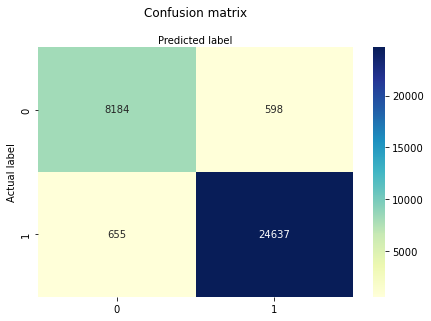

In [30]:
# Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
# Visualizing Decision Tree
from sklearn.tree import export_graphviz
import six
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.230531 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.230531 to fit



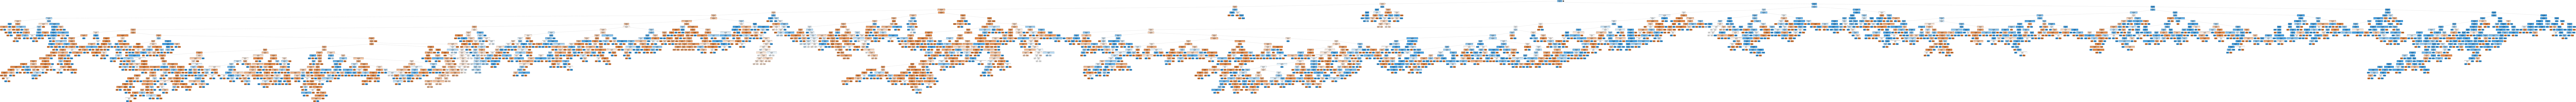

In [38]:
dot_data = six.StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Sun_Features,class_names=['N','Y'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dfJoin_DT.png')
Image(graph.create_png())

In [67]:
## In this section, we further optimize our classifier (decision tree) using a method called "pruning" to improve the classification accuracy, and also
## Interpretability of our tree. We can change the depth of tree using variable ' max_depth' parameter. High value for  'max_depth' will give us
## deep tree (height of tree will be high), and this might give us good prediction  accuracy, but it will be hard to interpret, many features will be involved.
## Lower value for  "max_depth" will give us shorter tree, and this might decrease the prediction performance, but we will have a less features, so will be 
## easy to interpret the tree.

## How do we interpret the tree? : By interpratation, we want to figure out which feature/features are very important in classifying a hospital as urbun or rural
## In decistion three, the features colose to the root of the three (top) containts most of the information regarding classifying the hospital as urbun or rural.

## In the case that when we setup the depth of three to 3 ( max_depth=3), we can see that the first important feature is hospital bed count and the second important 
## feature is unreim_cost for classifying an hispotal as urban or rural.

## Regarding to understand how much each features has information in classifying an hospital as urban or rural we look at a quantity called "entropy". 

## Entropy gives us a way to understand the information content of each feature. The higher the entropy value for each feature, the less certain/informative that 
## feature is. As you can see in this tree, 

# Optimizing Decision Tree performance



# Optimizing Decision Tree performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

#

Accuracy: 0.8451018371779069


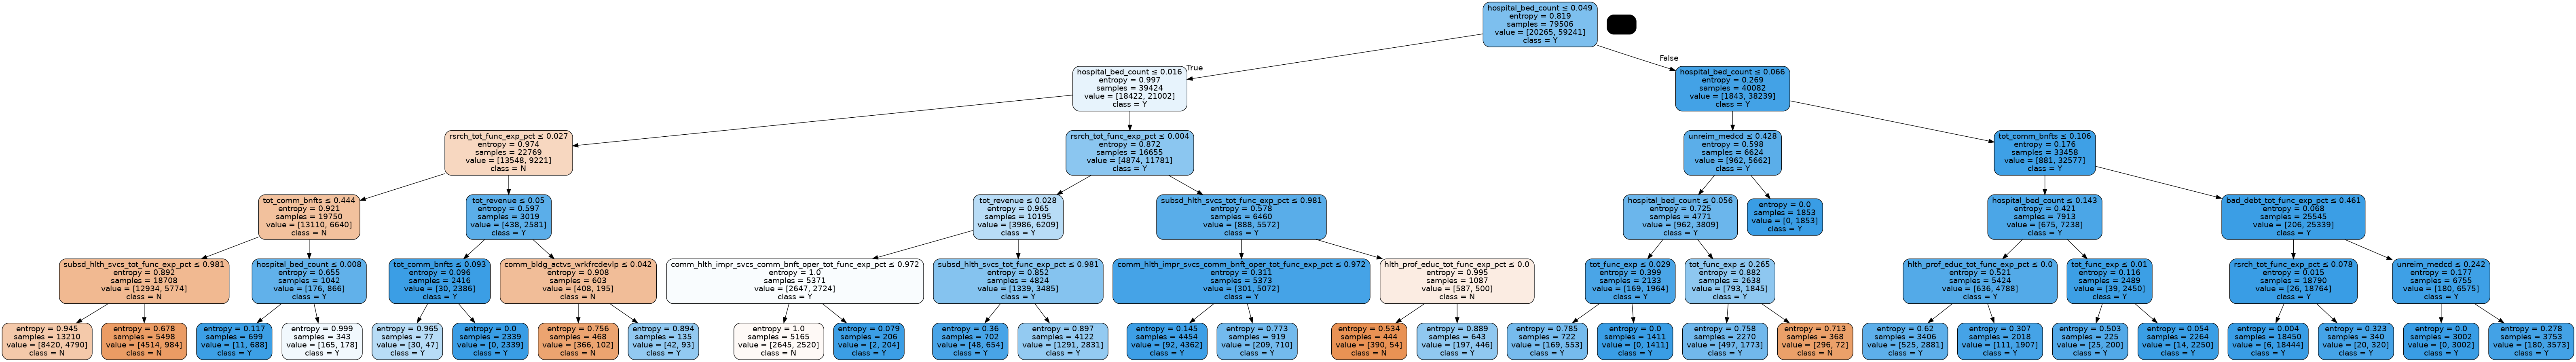

In [68]:
# visualizing the prunned tree
dot_data = six.StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = Sun_Features,class_names=['N','Y'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dfJoinDT_new.png')
Image(graph.create_png())

In [28]:
# Is variation in the amount of spending (all three measures) between urban and rural hospitals
# significant for each of the two-state,
# you are comparing?
# Are the difference in the mean for those spending significant between states 
# (comparing urban areas for each state and rural areas for each state statistically significant or by chance?
#  Each measure by the urban flag needs to be tested between the two states you are comparing (6 t-tests)

In [33]:
## Compute t test between rural and urban for each community benefit, community building, and community health improvement for ME
values= ['NY','ME']
dfJoin_New = dfJoin[dfJoin['state'].isin(values)]
statistical = dfJoin_New[['state','tot_comm_bnfts','comm_bldg_actvs','comm_bldg_actvs_htlhimprvadvcy']]
print(statistical.groupby('state').var())
values= ['ME']
dfJoin_ME = dfJoin_New[dfJoin_New['state'].isin(values)]

       tot_comm_bnfts  comm_bldg_actvs  comm_bldg_actvs_htlhimprvadvcy
state                                                                 
ME       8.134304e+14     1.500826e+11                    4.069325e+10
NY       1.521695e+16     1.609377e+11                    1.752200e+10


In [34]:
values= ['NY']
dfJoin_NY = dfJoin_New[dfJoin_New['state'].isin(values)]

In [44]:
## For ME:

values= ['Y']
dfJoin_ME_Urban = dfJoin_ME[dfJoin_ME['urban_location_f'].isin(values)]

values= ['N']
dfJoin_ME_Rural= dfJoin_ME[dfJoin_ME['urban_location_f'].isin(values)]

## ttest for community benefit (rural vs urban)
tot_comm_bnfts_ME_rural=dfJoin_ME_Rural['tot_comm_bnfts']
tot_comm_bnfts_ME_urban=dfJoin_ME_Urban['tot_comm_bnfts']

res = ttest_ind(tot_comm_bnfts_ME_rural, tot_comm_bnfts_ME_urben)
print(f'\n Significance Test:\n')
print(res)

# Null hypothesis (H_0)
# There is no difference in community benefit between rural and urban hospitals in Maine
## Alternative hypthesis (H_1)  There is difference in Total community benefits between rural and urban hospitals in Maine 

# Conclusion: As we can see the  p value for this test is significant(statistic=9.39980693038192, pvalue=1.1456777846640618e-18), which means that we reject the null hypothesis
## and accept the alternative hypothesis




 Significance Test:

Ttest_indResult(statistic=9.39980693038192, pvalue=1.1456777846640618e-18)


<AxesSubplot:title={'center':'tot_comm_bnfts'}, xlabel='urban_location_f'>

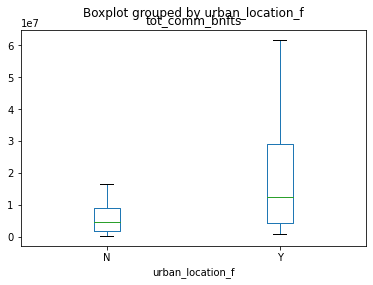

In [45]:

dfJoin_ME.boxplot(by='urban_location_f', column=['tot_comm_bnfts'],showfliers=False, grid = False)

In [50]:
## ttest for community building 
comm_bldg_actvs_ME_rural=dfJoin_ME_Rural['comm_bldg_actvs']
comm_bldg_actvs_ME_urban=dfJoin_ME_Urban['comm_bldg_actvs']

res2 = ttest_ind(comm_bldg_actvs_ME_rural, comm_bldg_actvs_ME_urban)
print(f'\n Significance Test:\n')
print(res2)


# Null hypothesis (H_0)
# There is no difference in community building between rural and urban hospitals in Maine
## Alternative hypthesis (H_1)  There is difference in Total community buildings between rural and urban hospitals in Maine 

# Conclusion: As we can see the  p value for this test is significant(statistic=-2.0283433062581464, pvalue=0.04336365418082827), which means that we reject the null hypothesis
## and accept the alternative hypothesis



 Significance Test:

Ttest_indResult(statistic=-2.0283433062581464, pvalue=0.04336365418082827)


<AxesSubplot:title={'center':'comm_bldg_actvs'}, xlabel='urban_location_f'>

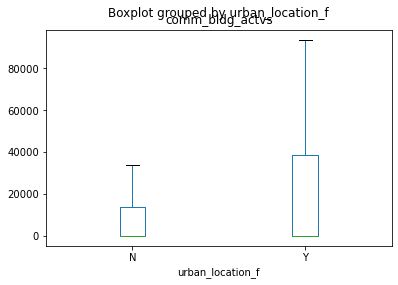

In [51]:
dfJoin_ME.boxplot(by='urban_location_f', column=['comm_bldg_actvs'],showfliers=False, grid = False)

In [52]:

## tttest community health improvement
comm_bldg_actvs_htlhimprvadvcy_ME_rural=dfJoin_ME_Rural['comm_bldg_actvs_htlhimprvadvcy']
comm_bldg_actvs_htlhimprvadvcy_ME_urban=dfJoin_ME_Urban['comm_bldg_actvs_htlhimprvadvcy']

res3 = ttest_ind(comm_bldg_actvs_htlhimprvadvcy_ME_rural, comm_bldg_actvs_htlhimprvadvcy_ME_urban)
print(f'\n Significance Test:\n')
print(res3)


# Null hypothesis (H_0)
# There is no difference in community health improvement between rural and urban hospitals in Maine
## Alternative hypthesis (H_1)  There is difference in Total community health improvement between rural and urban hospitals in Maine 

# Conclusion: As we can see the  p value for this test is significant(statistic=2.4604738114077827, pvalue=0.014410017132342308), which means that we reject the null hypothesis
## and accept the alternative hypothesis



 Significance Test:

Ttest_indResult(statistic=2.4604738114077827, pvalue=0.014410017132342308)


<AxesSubplot:title={'center':'comm_bldg_actvs_htlhimprvadvcy'}, xlabel='urban_location_f'>

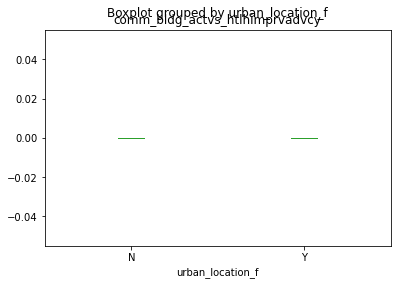

In [53]:
dfJoin_ME.boxplot(by='urban_location_f', column=['comm_bldg_actvs_htlhimprvadvcy'],showfliers=False, grid = False)

In [54]:
##  Compute t test between rural and urban for each community benefit, community building, and community health improvement For NY:


values= ['Y']
dfJoin_NY_Urban = dfJoin_NY[dfJoin_NY['urban_location_f'].isin(values)]

values= ['N']
dfJoin_NY_Rural= dfJoin_NY[dfJoin_NY['urban_location_f'].isin(values)]

## ttest for community benefit (rural vs urban)
tot_comm_bnfts_NY_rural=dfJoin_NY_Rural['tot_comm_bnfts']
tot_comm_bnfts_NY_urban=dfJoin_NY_Urban['tot_comm_bnfts']

res4 = ttest_ind(tot_comm_bnfts_NY_rural, tot_comm_bnfts_NY_urban)
print(f'\n Significance Test:\n')
print(res4)

# Null hypothesis (H_0)
# There is no difference in community benefit between rural and urban hospitals in New York
## Alternative hypthesis (H_1)  There is difference in Total community benefits between rural and urban hospitals in New York

# Conclusion: As we can see the  p value for this test is significant(statistic=8.712611773687932, pvalue=6.015407548055674e-18), which means that we reject the null hypothesis
## and accept the alternative hypothesis



 Significance Test:

Ttest_indResult(statistic=-8.712611773687932, pvalue=6.015407548055674e-18)


<AxesSubplot:title={'center':'tot_comm_bnfts'}, xlabel='urban_location_f'>

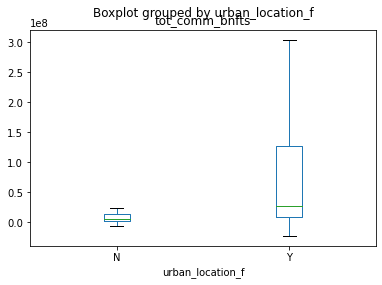

In [55]:
dfJoin_NY.boxplot(by='urban_location_f', column=['tot_comm_bnfts'],showfliers=False, grid = False)

In [56]:
## ttest for community building 
comm_bldg_actvs_NY_rural=dfJoin_NY_Rural['comm_bldg_actvs']
comm_bldg_actvs_NY_urban=dfJoin_NY_Urban['comm_bldg_actvs']

res5 = ttest_ind(comm_bldg_actvs_NY_rural, comm_bldg_actvs_NY_urban)
print(f'\n Significance Test:\n')
print(res5)


# Null hypothesis (H_0)
# There is no difference in community building between rural and urban hospitals in New York
## Alternative hypthesis (H_1)  There is difference in Total community buildings between rural and urban hospitals in New York

# Conclusion: As we can see the  p value for this test is significant(statistic=-3.672745845765052, pvalue=0.0002461239012297512), which means that we reject the null hypothesis
## and accept the alternative hypothesis



 Significance Test:

Ttest_indResult(statistic=-3.672745845765052, pvalue=0.0002461239012297512)


<AxesSubplot:title={'center':'comm_bldg_actvs'}, xlabel='urban_location_f'>

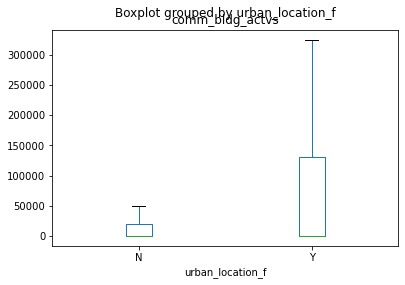

In [57]:
dfJoin_NY.boxplot(by='urban_location_f', column=['comm_bldg_actvs'],showfliers=False, grid = False)

In [58]:

## ttest community health improvement
comm_bldg_actvs_htlhimprvadvcy_NY_rural=dfJoin_NY_Rural['comm_bldg_actvs_htlhimprvadvcy']
comm_bldg_actvs_htlhimprvadvcy_NY_urban=dfJoin_NY_Urban['comm_bldg_actvs_htlhimprvadvcy']

res6 = ttest_ind(comm_bldg_actvs_htlhimprvadvcy_NY_rural, comm_bldg_actvs_htlhimprvadvcy_NY_urban)
print(f'\n Significance Test:\n')
print(res6)


# Null hypothesis (H_0)
# There is no difference in community health improvement between rural and urban hospitals in New York
## Alternative hypthesis (H_1)  There is difference in Total community health improvement between rural and urban hospitals in New York

# Conclusion: As we can see the  p value for this test is significant(statistic=-4.923106498136816, pvalue=9.200719594647552e-07), which means that we reject the null hypothesis
## and accept the alternative hypothesis




 Significance Test:

Ttest_indResult(statistic=-4.923106498136816, pvalue=9.200719594647552e-07)


<AxesSubplot:title={'center':'comm_bldg_actvs_htlhimprvadvcy'}, xlabel='urban_location_f'>

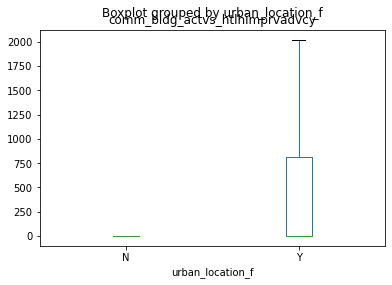

In [59]:
dfJoin_NY.boxplot(by='urban_location_f', column=['comm_bldg_actvs_htlhimprvadvcy'],showfliers=False, grid = False)